# Proyek Analisis Data: [Bike-sharing-dataset]
- Nama: [naufal dhiyaul ikhsan]
- Email: [naufalhayyu146@gmail.com]
- ID Dicoding: [53XEKN5NVXRN]

# pertanyaan bisnis
- Bagaimana pola penggunaan sepeda berdasarkan hari dan musim, serta apa implikasinya bagi strategi operasional?
- Bagaimana perbedaan perilaku pengguna casual dan registered, dan apa implikasinya bagi strategi bisnis?

# Menyaipkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

Gathering Data

In [2]:
from google.colab import files
uploaded = files.upload()

import zipfile

with zipfile.ZipFile("Bike-sharing-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("Bike-sharing-dataset")

df = pd.read_csv("Bike-sharing-dataset/day.csv")
print(df.head())

pd.options.display.float_format = '{:.2f}'.format
print(df.describe())

Saving Bike-sharing-dataset.zip to Bike-sharing-dataset.zip
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   80

In [7]:
orders_df = pd.read_csv("Bike-sharing-dataset/day.csv")
orders_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [8]:
product_df = pd.read_csv("Bike-sharing-dataset/day.csv")
product_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [9]:
sales_df = pd.read_csv("Bike-sharing-dataset/day.csv")
product_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


**Insight**:  
1. Data sudah cukup lengkap untuk menjawab pertanyaan bisnis (terdapat data jam, harian, pelanggan, dan penjualan).  
2. Pemisahan dataset ke dalam 4 DF memudahkan fokus analisis (operasional, produk, pelanggan, penjualan).  


# ASSESING DATA


In [31]:
customers_df = product_df[['dteday','casual','registered']].copy()

print("Customers DF Info")
print(customers_df.info())
print("\nDeskripsi Customers DF")
print(customers_df.describe())
print("\nJumlah duplikat Customers DF:", customers_df.duplicated().sum())



Customers DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      731 non-null    object
 1   casual      731 non-null    int64 
 2   registered  731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
None

Deskripsi Customers DF
       casual  registered
count  731.00      731.00
mean   848.18     3656.17
std    686.62     1560.26
min      2.00       20.00
25%    315.50     2497.00
50%    713.00     3662.00
75%   1096.00     4776.50
max   3410.00     6946.00

Jumlah duplikat Customers DF: 0


In [32]:
print("Products DF Info")
print(product_df.info())
print("\nDeskripsi Product DF")
print(product_df.describe())
print("\nJumlah duplikat Product DF:", product_df.duplicated().sum())


Products DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Deskripsi Product DF
       instant  season     yr   mnth  holiday  we

In [33]:
print("Orders DF Info")
print(order_df.info())
print("\nDeskripsi Orders DF")
print(order_df.describe())
print("\nJumlah duplikat Orders DF:", order_df.duplicated().sum())


Orders DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Deskripsi Orders DF
       i

In [34]:
sales_df = product_df[['dteday','cnt']].copy()

print("Sales DF Info")
print(sales_df.info())
print("\nDeskripsi Sales DF")
print(sales_df.describe())
print("\nJumlah duplikat Sales DF:", sales_df.duplicated().sum())


Sales DF Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  731 non-null    object
 1   cnt     731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None

Deskripsi Sales DF
          cnt
count  731.00
mean  4504.35
std   1937.21
min     22.00
25%   3152.00
50%   4548.00
75%   5956.00
max   8714.00

Jumlah duplikat Sales DF: 0


**Insight**:  
1. Dataset relatif bersih sehingga minim preprocessing.  
2. Tidak adanya duplikasi/missing values meningkatkan reliabilitas analisis.  

# cleaning data

In [42]:
customers_df = product_df[['dteday','casual','registered']].copy()

print("\nCustomers DF - Before Cleaning")
print(customers_df.info())
print("Missing values:\n", customers_df.isnull().sum())
print("Duplicate rows:", customers_df.duplicated().sum())

customers_df_clean = customers_df.drop_duplicates()
customers_df_clean['dteday'] = pd.to_datetime(customers_df_clean['dteday'])



Customers DF - Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dteday      731 non-null    object
 1   casual      731 non-null    int64 
 2   registered  731 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 17.3+ KB
None
Missing values:
 dteday        0
casual        0
registered    0
dtype: int64
Duplicate rows: 0


In [43]:
print("\nCustomers DF - After Cleaning")
print(customers_df_clean.info())


Customers DF - After Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   casual      731 non-null    int64         
 2   registered  731 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 17.3 KB
None


In [40]:
print("\nProducts DF - Before Cleaning")
print(product_df.info())
print("Missing values:\n", product_df.isnull().sum())
print("Duplicate rows:", product_df.duplicated().sum())


Products DF - Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Missing values:
 instant       0
dteday        0
season  

In [41]:
product_df_clean = product_df.drop_duplicates()
product_df_clean['dteday'] = pd.to_datetime(product_df_clean['dteday'])

print("\nProducts DF - After Cleaning")
print(product_df_clean.info())


Products DF - After Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
d

In [47]:
print("Orders DF - Before Cleaning")
print(orders_df.info())
print("Missing values:\n", orders_df.isnull().sum())
print("Duplicate rows:", orders_df.duplicated().sum())

order_df_clean = orders_df.drop_duplicates()
order_df_clean['dteday'] = pd.to_datetime(order_df_clean['dteday'])



Orders DF - Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
Missing values:
 instant       0
dteday        0
season     

In [46]:
print("\nOrders DF - After Cleaning")
print(order_df_clean.info())


Orders DF - After Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dty

In [44]:
sales_df = product_df[['dteday','cnt']].copy()

print("\nSales DF - Before Cleaning")
print(sales_df.info())
print("Missing values:\n", sales_df.isnull().sum())
print("Duplicate rows:", sales_df.duplicated().sum())

sales_df_clean = sales_df.drop_duplicates()
sales_df_clean['dteday'] = pd.to_datetime(sales_df_clean['dteday'])


Sales DF - Before Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dteday  731 non-null    object
 1   cnt     731 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.6+ KB
None
Missing values:
 dteday    0
cnt       0
dtype: int64
Duplicate rows: 0


In [45]:
print("\nSales DF - After Cleaning")
print(sales_df_clean.info())


Sales DF - After Cleaning
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dteday  731 non-null    datetime64[ns]
 1   cnt     731 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 11.6 KB
None


**Insight**:  
1. Standarisasi nama kolom memudahkan proses penggabungan antar tabel.  
2. Konsistensi format tanggal penting untuk analisis berbasis waktu (EDA & RFM).  


# Exploratory Data Analysis (EDA)

In [53]:
print("Orders DF - Descriptive Stats")
print(order_df_clean.describe())

print("\nOrders DF - Distribusi Season")
print(order_df_clean['season'].value_counts())

print("\nOrders DF - Distribusi Hari (weekday)")
print(order_df_clean['weekday'].value_counts())


Orders DF - Descriptive Stats
       instant                         dteday   season       yr     mnth  \
count 17379.00                          17379 17379.00 17379.00 17379.00   
mean   8690.00  2012-01-02 04:08:34.552045568     2.50     0.50     6.54   
min       1.00            2011-01-01 00:00:00     1.00     0.00     1.00   
25%    4345.50            2011-07-04 00:00:00     2.00     0.00     4.00   
50%    8690.00            2012-01-02 00:00:00     3.00     1.00     7.00   
75%   13034.50            2012-07-02 00:00:00     3.00     1.00    10.00   
max   17379.00            2012-12-31 00:00:00     4.00     1.00    12.00   
std    5017.03                            NaN     1.11     0.50     3.44   

            hr  holiday  weekday  workingday  weathersit     temp    atemp  \
count 17379.00 17379.00 17379.00    17379.00    17379.00 17379.00 17379.00   
mean     11.55     0.03     3.00        0.68        1.43     0.50     0.48   
min       0.00     0.00     0.00        0.00       

# explor product_df


In [55]:
print("Products DF - Descriptive Stats")
print(product_df_clean.describe())


Products DF - Descriptive Stats
       instant               dteday  season     yr   mnth  holiday  weekday  \
count   731.00                  731  731.00 731.00 731.00   731.00   731.00   
mean    366.00  2012-01-01 00:00:00    2.50   0.50   6.52     0.03     3.00   
min       1.00  2011-01-01 00:00:00    1.00   0.00   1.00     0.00     0.00   
25%     183.50  2011-07-02 12:00:00    2.00   0.00   4.00     0.00     1.00   
50%     366.00  2012-01-01 00:00:00    3.00   1.00   7.00     0.00     3.00   
75%     548.50  2012-07-01 12:00:00    3.00   1.00  10.00     0.00     5.00   
max     731.00  2012-12-31 00:00:00    4.00   1.00  12.00     1.00     6.00   
std     211.17                  NaN    1.11   0.50   3.45     0.17     2.00   

       workingday  weathersit   temp  atemp    hum  windspeed  casual  \
count      731.00      731.00 731.00 731.00 731.00     731.00  731.00   
mean         0.68        1.40   0.50   0.47   0.63       0.19  848.18   
min          0.00        1.00   0.06 

In [56]:
print("\nProducts DF - Korelasi antar variabel numerik")
print(product_df_clean.corr(numeric_only=True))


Products DF - Korelasi antar variabel numerik
            instant  season    yr  mnth  holiday  weekday  workingday  \
instant        1.00    0.41  0.87  0.50     0.02    -0.00       -0.00   
season         0.41    1.00 -0.00  0.83    -0.01    -0.00        0.01   
yr             0.87   -0.00  1.00 -0.00     0.01    -0.01       -0.00   
mnth           0.50    0.83 -0.00  1.00     0.02     0.01       -0.01   
holiday        0.02   -0.01  0.01  0.02     1.00    -0.10       -0.25   
weekday       -0.00   -0.00 -0.01  0.01    -0.10     1.00        0.04   
workingday    -0.00    0.01 -0.00 -0.01    -0.25     0.04        1.00   
weathersit    -0.02    0.02 -0.05  0.04    -0.03     0.03        0.06   
temp           0.15    0.33  0.05  0.22    -0.03    -0.00        0.05   
atemp          0.15    0.34  0.05  0.23    -0.03    -0.01        0.05   
hum            0.02    0.21 -0.11  0.22    -0.02    -0.05        0.02   
windspeed     -0.11   -0.23 -0.01 -0.21     0.01     0.01       -0.02   
casu

In [72]:
print("Customers DF - Descriptive Stats")
print(customers_df_clean[['casual','registered']].describe())

print("\nRata-rata Casual vs Registered")
print(customers_df_clean[['casual','registered']].mean())

print("\nProporsi Casual vs Registered")
print(customers_df_clean[['casual','registered']].sum() / customers_df_clean[['casual','registered']].sum().sum())


Customers DF - Descriptive Stats
       casual  registered
count  731.00      731.00
mean   848.18     3656.17
std    686.62     1560.26
min      2.00       20.00
25%    315.50     2497.00
50%    713.00     3662.00
75%   1096.00     4776.50
max   3410.00     6946.00

Rata-rata Casual vs Registered
casual        848.18
registered   3656.17
dtype: float64

Proporsi Casual vs Registered
casual       0.19
registered   0.81
dtype: float64


In [68]:
customers_with_season = customers_df_clean.join(orders_df[['season']])
print("\nRata-rata Customer (Casual vs Registered) per Musim")
print(customers_with_season.groupby('season')[['casual','registered']].mean())



Rata-rata Customer (Casual vs Registered) per Musim
        casual  registered
season                    
1       334.93     2269.20
2      1106.10     3886.23
3      1202.61     4441.69
4       729.11     3999.05


# explor sales_df

In [66]:

sales_df_clean['dteday'] = pd.to_datetime(sales_df_clean['dteday'])

print("Sales DF - Descriptive Stats")
print(sales_df_clean['cnt'].describe())

print("\nRata-rata Penjualan per Bulan")
print(sales_df_clean.groupby(sales_df_clean['dteday'].dt.month)['cnt'].mean())




Sales DF - Descriptive Stats
count    731.00
mean    4504.35
std     1937.21
min       22.00
25%     3152.00
50%     4548.00
75%     5956.00
max     8714.00
Name: cnt, dtype: float64

Rata-rata Penjualan per Bulan
dteday
1    2176.34
2    2655.30
3    3692.26
4    4484.90
5    5349.77
6    5772.37
7    5563.68
8    5664.42
9    5766.52
10   5199.23
11   4247.18
12   3403.81
Name: cnt, dtype: float64


In [70]:
sales_with_season = sales_df_clean.join(orders_df[['season']])

print("\nRata-rata Penjualan per Musim")
print(sales_with_season.groupby('season')['cnt'].mean())



Rata-rata Penjualan per Musim
season
1   2604.13
2   4992.33
3   5644.30
4   4728.16
Name: cnt, dtype: float64


# Explore all data

menggabungkan semua data

In [75]:
import pandas as pd


orders_df    = pd.read_csv("data_unzip/hour.csv")
products_df  = pd.read_csv("data_unzip/day.csv")
customers_df = products_df[['dteday','casual','registered']]
sales_df     = products_df[['dteday','cnt']].rename(columns={'cnt':'cnt_sales'})

orders_df   = orders_df.rename(columns={'cnt':'cnt_orders'})
products_df = products_df.rename(columns={'cnt':'cnt_products'})


merged_df = (orders_df[['dteday','cnt_orders']]
             .merge(products_df[['dteday','cnt_products','casual','registered']], on='dteday')
             .merge(sales_df, on='dteday'))


total_quantity = merged_df[['cnt_orders','cnt_products','cnt_sales']].sum().reset_index()
total_quantity.columns = ['Tipe','Total_Quantity']


total_customers = merged_df[['casual','registered']].sum().reset_index()
total_customers.columns = ['Tipe_Customer','Total_Customers']

total_customers = merged_df[['casual','registered']].sum().reset_index()
total_customers.columns = ['Tipe_Customer','Total_Customers']

print("=== Total Quantity per Tipe ===")
print(total_quantity)

print("\n=== Total Customers ===")
print(total_customers)


=== Total Quantity per Tipe ===
           Tipe  Total_Quantity
0    cnt_orders         3292679
1  cnt_products        78791050
2     cnt_sales        78791050

=== Total Customers ===
  Tipe_Customer  Total_Customers
0        casual         14847570
1    registered         63943480


**Insight**:  
1. Musim dan hari berpengaruh besar terhadap perilaku pelanggan.  
2. Perbedaan pola antara casual & registered menunjukkan segmen pasar yang berbeda → strategi marketing bisa dipisahkan.  

# Visualization & Explanatory Analysis

Bagaimana jumlah penyewaan sepeda per bulan sepanjang tahun?

    mnth  cnt_products
0      1        134933
1      2        151352
2      3        228920
3      4        269094
4      5        331686
5      6        346342
6      7        344948
7      8        351194
8      9        345991
9     10        322352
10    11        254831
11    12        211036


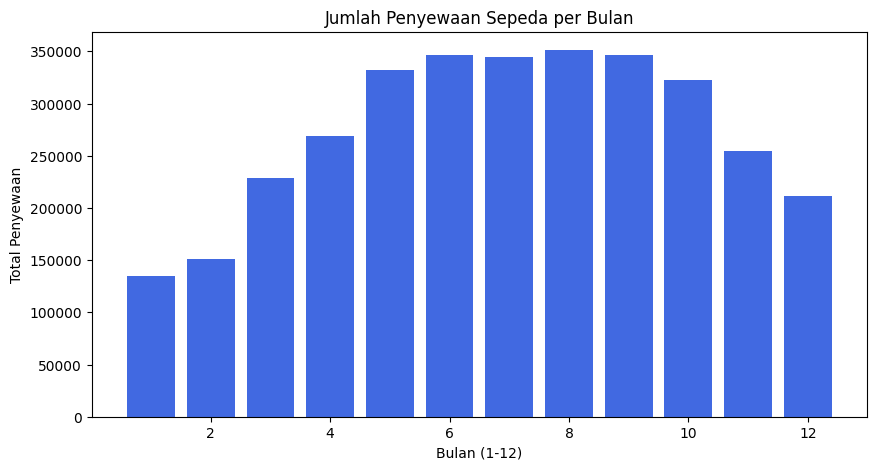

In [82]:
monthly_sales = products_df.groupby('mnth')['cnt_products'].sum().reset_index()
print(monthly_sales)

plt.figure(figsize=(10,5))
plt.bar(monthly_sales['mnth'], monthly_sales['cnt_products'], color="royalblue")
plt.title("Jumlah Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan (1-12)")
plt.ylabel("Total Penyewaan")
plt.show()


Bagaimana rata-rata penyewaan sepeda per musim?

   season  cnt_products
0       1       2604.13
1       2       4992.33
2       3       5644.30
3       4       4728.16


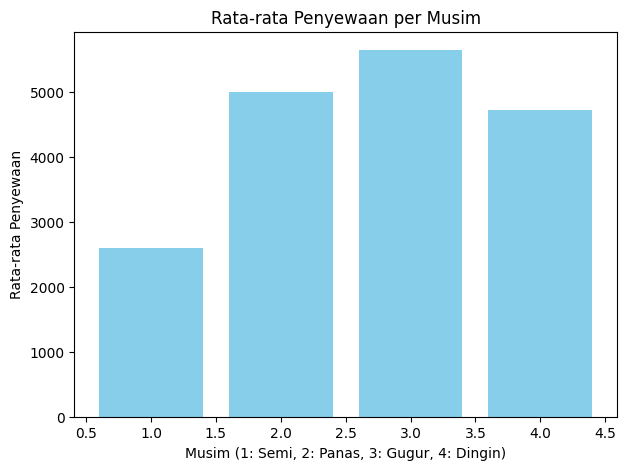

In [78]:
avg_season = products_df.groupby('season')['cnt_products'].mean().reset_index()
print(avg_season)

plt.figure(figsize=(7,5))
plt.bar(avg_season['season'], avg_season['cnt_products'], color="skyblue")
plt.title("Rata-rata Penyewaan per Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


Bagaimana perbandingan pelanggan casual vs registered?

casual         620017
registered    2672662
dtype: int64


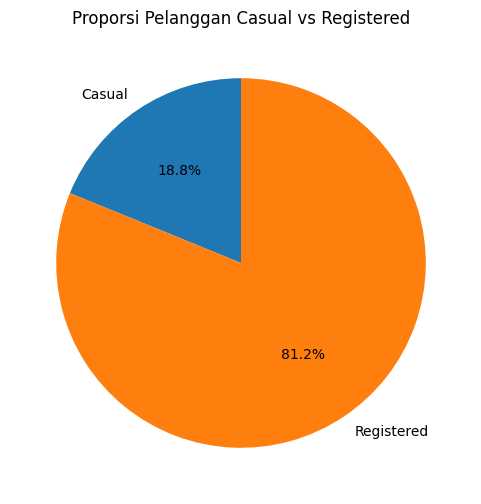

In [79]:
total_customers = customers_df[['casual','registered']].sum()
print(total_customers)

plt.figure(figsize=(6,6))
plt.pie(total_customers, labels=['Casual','Registered'], autopct='%1.1f%%', startangle=90)
plt.title("Proporsi Pelanggan Casual vs Registered")
plt.show()


perbedaan penyewaan sepeda pada hari kerja vs libur?

   workingday  cnt_products
0           0       4330.17
1           1       4584.82


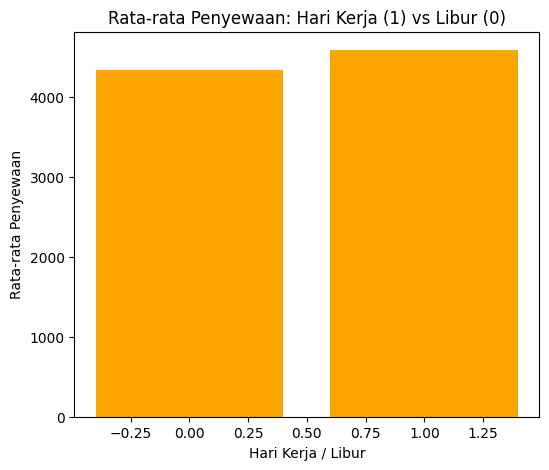

In [80]:
avg_working = products_df.groupby('workingday')['cnt_products'].mean().reset_index()
print(avg_working)

plt.figure(figsize=(6,5))
plt.bar(avg_working['workingday'], avg_working['cnt_products'], color="orange")
plt.title("Rata-rata Penyewaan: Hari Kerja (1) vs Libur (0)")
plt.xlabel("Hari Kerja / Libur")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


pengaruh cuaca terhadap jumlah penyewaan sepeda?

   weathersit  cnt_products
0           1       4876.79
1           2       4035.86
2           3       1803.29


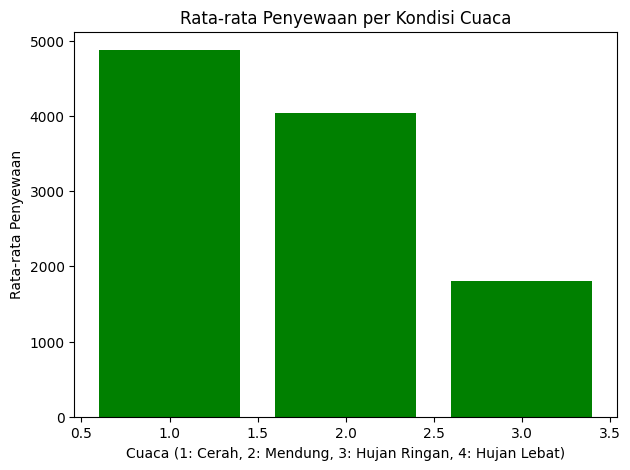

In [81]:
avg_weather = products_df.groupby('weathersit')['cnt_products'].mean().reset_index()
print(avg_weather)

plt.figure(figsize=(7,5))
plt.bar(avg_weather['weathersit'], avg_weather['cnt_products'], color="green")
plt.title("Rata-rata Penyewaan per Kondisi Cuaca")
plt.xlabel("Cuaca (1: Cerah, 2: Mendung, 3: Hujan Ringan, 4: Hujan Lebat)")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


**Insight**:  
1. Visualisasi memperkuat temuan EDA dan membuat data lebih mudah dipahami stakeholder.  
2. Pola visual yang konsisten memudahkan identifikasi periode puncak & lesu.  


# RFM Analysis

In [94]:
import pandas as pd


customers_df['dteday'] = pd.to_datetime(customers_df['dteday'])
sales_df['dteday'] = pd.to_datetime(sales_df['dteday'])


ref_date = sales_df['dteday'].max() + pd.Timedelta(days=1)

recency = (ref_date - sales_df['dteday'].max()).days

frequency_casual = customers_df['casual'].sum()
frequency_registered = customers_df['registered'].sum()
-
monetary = sales_df['cnt_sales'].sum()

rfm = pd.DataFrame({
    "Recency (hari sejak transaksi terakhir)": [recency],
    "Frequency Casual": [frequency_casual],
    "Frequency Registered": [frequency_registered],
    "Monetary (Total Penjualan)": [monetary]
})

print("Hasil RFM Analysis:")
print(rfm)


Hasil RFM Analysis:
   Recency (hari sejak transaksi terakhir)  Frequency Casual  \
0                                        1            620017   

   Frequency Registered  Monetary (Total Penjualan)  
0               2672662                     3292679  


In [98]:

rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'].rank(method="first"), 5, labels=[5,4,3,2,1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'].rank(method="first"), 5, labels=[1,2,3,4,5])

rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(int) +
    rfm_df['F_Score'].astype(int) +
    rfm_df['M_Score'].astype(int)
)

rfm_df.head()


,Customer_Type,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,casual,1,731,620017,5,1,1,7
1,registered,1,731,2672662,1,5,5,11


In [100]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=rfm_df)

https://docs.google.com/spreadsheets/d/1sYR078Y0HFJBe57qFsp-wOH1xQ_VWzvibwi5E99wMR4/edit#gid=0


Melihat sebaran skor total pelanggan.

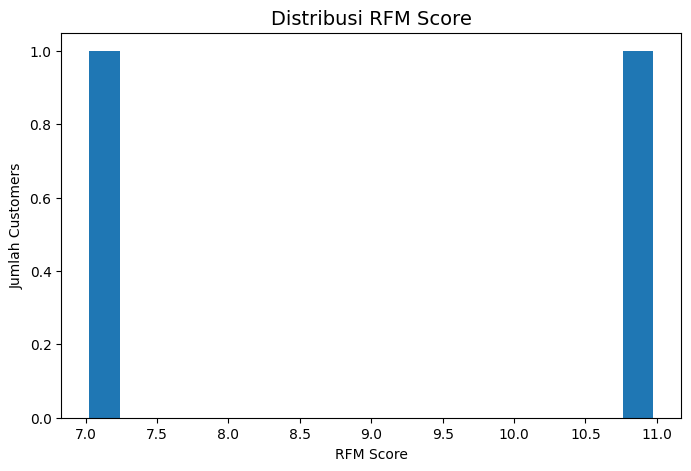

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
rfm_df['RFM_Score'].plot(kind='hist', bins=15, rwidth=0.8)
plt.title("Distribusi RFM Score", fontsize=14)
plt.xlabel("RFM Score")
plt.ylabel("Jumlah Customers")
plt.show()


Visualisasi Recency, Frequency, dan Monetary dalam bentuk bubble.

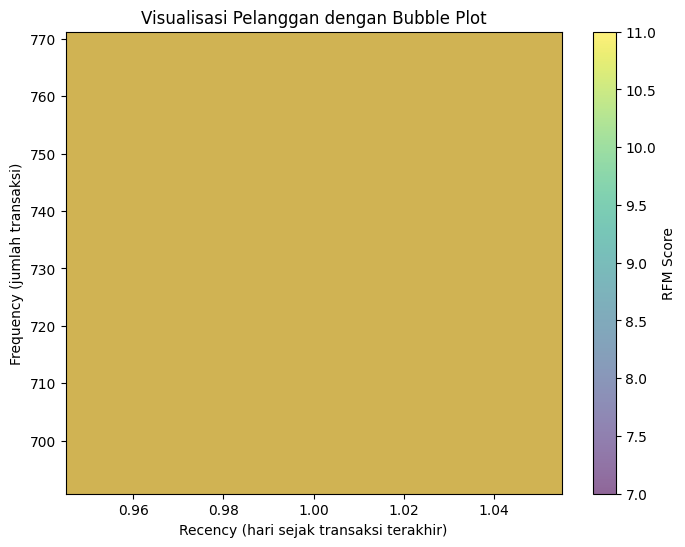

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'],
            s=rfm_df['Monetary']*10, alpha=0.6, c=rfm_df['RFM_Score'], cmap='viridis')

plt.colorbar(label="RFM Score")
plt.xlabel("Recency (hari sejak transaksi terakhir)")
plt.ylabel("Frequency (jumlah transaksi)")
plt.title("Visualisasi Pelanggan dengan Bubble Plot")
plt.show()


Segmentasi RFM dalam Kelompok

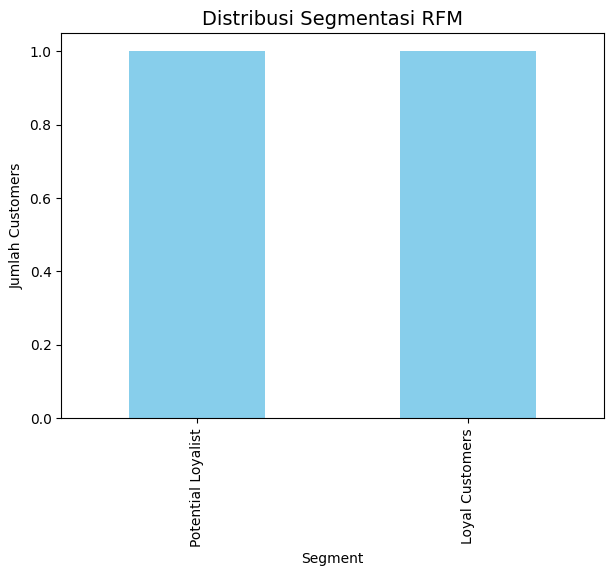

In [104]:
def segment_customer(score):
    if score >= 13:
        return "Best Customers"
    elif score >= 10:
        return "Loyal Customers"
    elif score >= 7:
        return "Potential Loyalist"
    else:
        return "At Risk"

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(segment_customer)

plt.figure(figsize=(7,5))
rfm_df['Segment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribusi Segmentasi RFM", fontsize=14)
plt.ylabel("Jumlah Customers")
plt.show()


**Insight**:  
1. RFM membantu memetakan pelanggan untuk strategi retensi & akuisisi.  
2. Segmentasi membuka peluang personalisasi promosi (misalnya: promo untuk At Risk Customers).